# Q1 - Ensemble Forecasts

## Zuerich (47.37, 8.57)

### Calculate the following skill scores by comparing forecast data to observation data:
1 - Bias  
2 - RMSE  
3 - ACC  
4 - Rank Histogram  

Calculate these for each day as well as overall.


In [3]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import cartopy.crs as ccrs   # main plotting routine
import cartopy.feature as cfeature  # allows shading

In [285]:
# input coordinates of location
ZuerichLatLon = np.array([47.37, 8.57])

In [273]:
# Load in forecast data from each of the nine forecasts

DAT_ammc = xr.open_dataset('forecast_data\\ammc_fc.nc')
DAT_babj = xr.open_dataset('forecast_data\\babj_fc.nc')
DAT_cwao = xr.open_dataset('forecast_data\\cwao_fc.nc')
DAT_dems = xr.open_dataset('forecast_data\\dems_fc.nc')
DAT_ecmwf = xr.open_dataset('forecast_data\\ecmwf_fc.nc')
DAT_kwbc = xr.open_dataset('forecast_data\\kwbc_fc.nc')
DAT_rjtd = xr.open_dataset('forecast_data\\rjtd_fc.nc')
DAT_rksl = xr.open_dataset('forecast_data\\rksl_fc.nc')
DAT_vabb = xr.open_dataset('forecast_data\\vabb_fc.nc')

In [274]:
T2M_ENS_ALL = xr.concat([DAT_ammc.t2m, DAT_babj.t2m, DAT_cwao.t2m, DAT_dems.t2m, DAT_ecmwf.t2m, DAT_kwbc.t2m, 
                  DAT_rjtd.t2m, DAT_rksl.t2m, DAT_vabb.t2m], "origin")

In [275]:
origin_names = np.array(['ammc','babj', 'cwao', 'dems', 'ecmwf', 'kwbc', 'rjtd', 'rksl', 'vabb'])

In [645]:
for i in origin_names:
    print(i)

ammc
babj
cwao
dems
ecmwf
kwbc
rjtd
rksl
vabb


In [276]:
T2M_ENS = T2M_ENS_ALL.sel(latitude=ZuerichLatLon[0], longitude=ZuerichLatLon[1], method='nearest') - 273.15

In [592]:
T2M_ENS_D = T2M_ENS.resample(time='D').mean(dim='time')

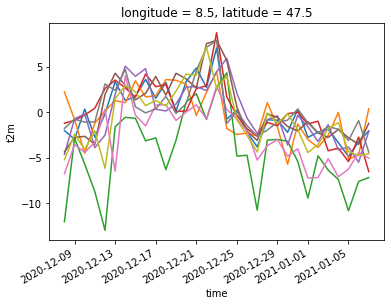

In [339]:
for i in range(0,9):
    (T2M_ENS_D[i,:]).plot(label = origin_names[i])

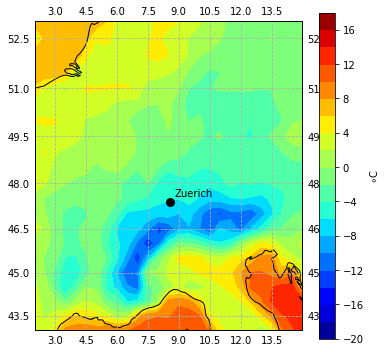

In [948]:
fig = plt.figure(figsize=[6,8])
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m', color='black', linewidth=1.)

ax.set_extent([2., 15., 43., 53.])

pc = ax.contourf(DAT_kwbc.t2m.longitude, DAT_kwbc.t2m.latitude, DAT_kwbc.t2m[0,:,:]-273.15, 
                 np.arange(-20,20,2), cmap='jet', transform=ccrs.PlateCarree())

ax.plot(ZuerichLatLon[1], ZuerichLatLon[0], 'ko', markersize=8, transform=ccrs.PlateCarree())
ax.text(ZuerichLatLon[1]+0.2, ZuerichLatLon[0]+0.2, 'Zuerich', transform=ccrs.PlateCarree())

qwe = fig.colorbar(pc, shrink=0.75, label='$\circ$C')
#plt.clabel(pc, inline=1, fontsize=12, inline_spacing=1, colors='black', fmt = '%1.0f')

ax.add_feature(cfeature.LAND)
#ax.set_title('Temperature on ' +np.datetime_as_string(DAT_ecmwf.t2m.time[0], unit = 'h'))

grd = ax.gridlines(draw_labels=True, linestyle = '--')
grd.top_labels=False
grd.right_labels=False

plt.savefig('..\\figures\\intro')

In [496]:
# Observed weather
# Given mean daily temperature in 0.1 degrees Celsius

DAT = pd.read_csv('TG_STAID000244.txt', skiprows=21, 
                 header=0, names=['DATE', 'TG', 'Q_TG'], 
                  usecols=[2,3,4], 
                  parse_dates=['DATE'], index_col=['DATE'])

DAT_OBS = DAT['20201208':'20210107']['TG']*0.1

OBS = DAT['TG']*0.1

In [810]:
(T2M_ENS_D.mean(axis=0)).plot()

<xarray.DataArray 't2m' (time: 31)>
array([-3.972132, -1.97227 , -2.510494, -2.8957  , -1.51791 ,  1.136622,
        2.67916 ,  1.559244,  1.376229,  1.114385,  0.992007,  0.795326,
        2.141533,  2.675641,  3.389611,  5.413297,  2.0187  , -0.686364,
       -2.200307, -4.159508, -1.180178, -1.47093 , -2.475354, -1.592563,
       -3.543788, -3.37043 , -3.069399, -3.421818, -5.176045, -4.151262,
       -3.629617], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-08 2020-12-09 ... 2021-01-07
    longitude  float32 8.5
    latitude   float32 47.5

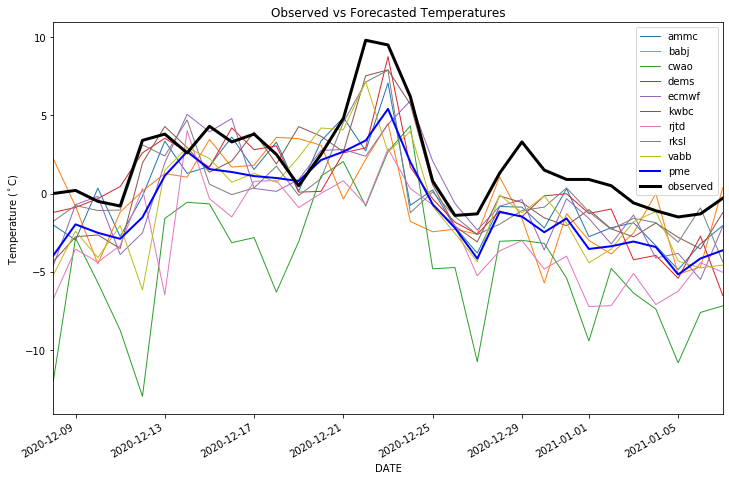

In [814]:
fig = plt.figure(figsize=(12,8))

for i in range(len(T2M_ENS_D)):
    T2M_ENS_D[i].plot(label=origin_names[i], linewidth=1)

(T2M_ENS_D.mean(axis=0)).plot(color='b', linewidth=2, label='pme')
DAT_OBS.plot(color='k', linewidth=3, label='observed')

plt.ylabel('Temperature ($^\circ$C)')
plt.legend(loc='upper right')
plt.title('Observed vs Forecasted Temperatures')

plt.savefig('..\\figures\\OvF1')

Text(0.5, 1.0, 'Forecasted vs Observed Average Daily Temperatures in Zuerich')

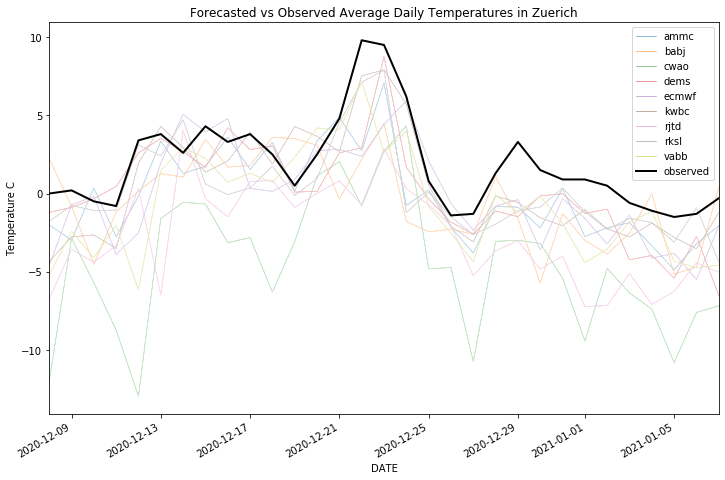

In [479]:
fig = plt.figure(figsize = [12,8])
for i in range(0,9):
    (T2M_ENS_D[i,:]).plot(label = origin_names[i], linewidth = 0.5) # Remove last three hourly frcsts so it ends with the black line
    (T2M_ENS_D[i,:]).plot(linewidth = 0.5, color = "white")        # Invisibly plot the last three so we still get the final xlabel tick for 2021-01-09
DAT_OBS.plot(label = "observed", linewidth = 2, color = "k")
plt.legend(loc = 'upper right')
plt.ylabel("Temperature C")
plt.title("Forecasted vs Observed Average Daily Temperatures in Zuerich")

---

So, we have the forecast data for each centre stored in *T2M_ENS_D*, and the observed data stored in *DAT_OBS*.

We'll plot each forecast along with the observed data,

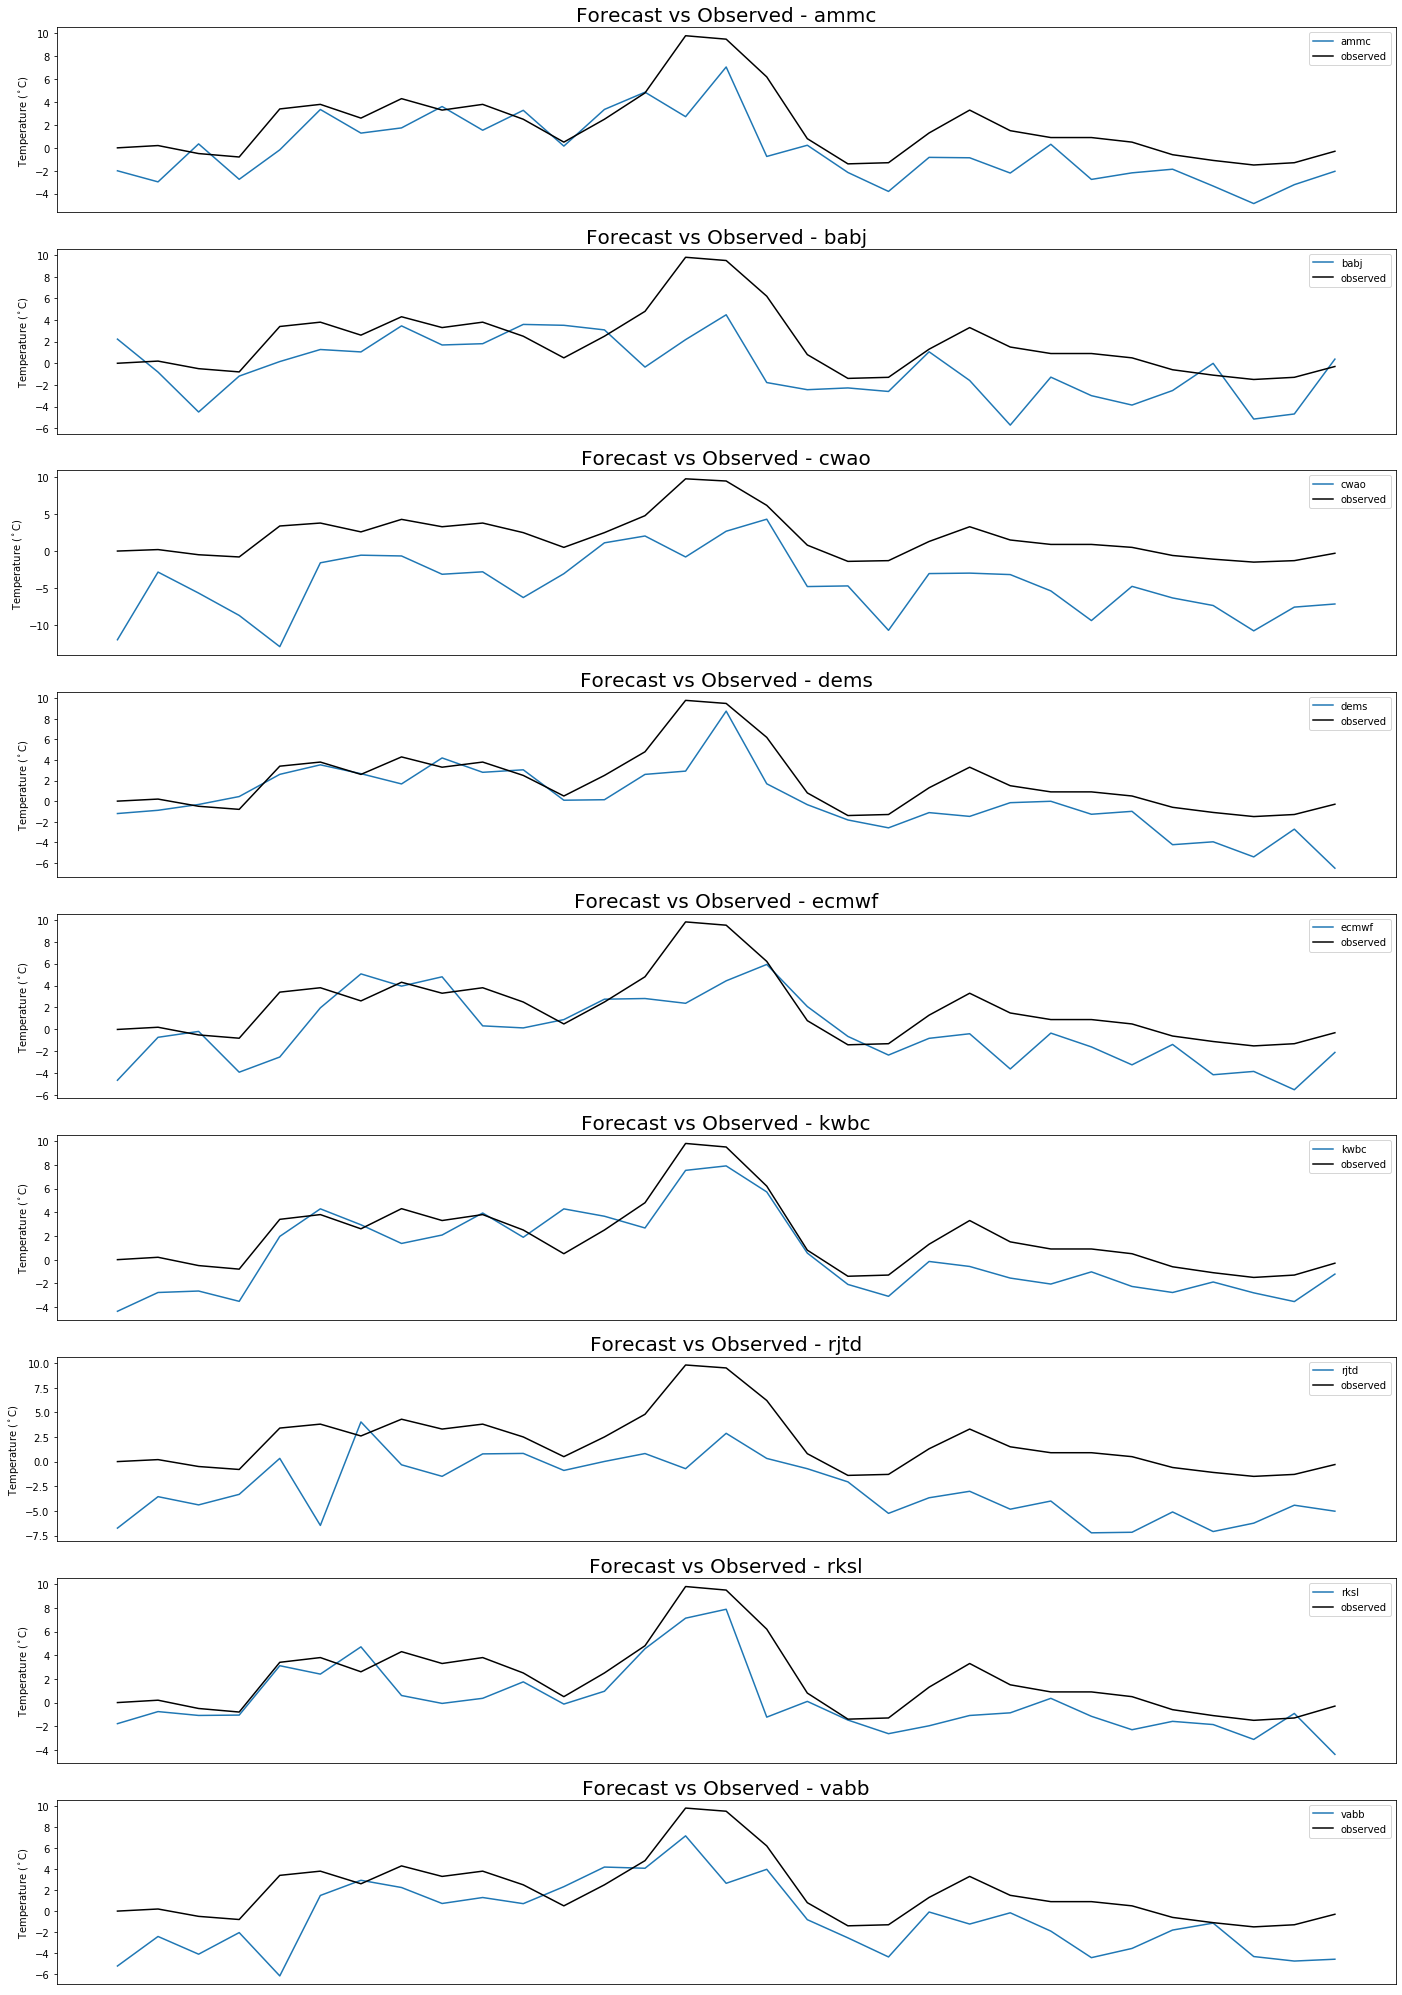

In [674]:
fig, axs = plt.subplots(9, 1, figsize=(24,36))

for i in range(len(T2M_ENS_D)):
    axs[i].plot(T2M_ENS_D['time'], T2M_ENS_D[i], label=origin_names[i])
    axs[i].plot(DAT_OBS, 'k-', label='observed')
    axs[i].legend()
    axs[i].set_ylabel('Temperature ($^\circ$C)')
    axs[i].set_title('Forecast vs Observed - '+origin_names[i], fontsize=20)
    axs[i].get_xaxis().set_visible(False)
    
plt.savefig('..\\figures\\OvF_sep')

---

## Skill Scores
---
### Bias

Bias is simply the average error. We will compute daily bias for each forecast, average these over the month to get the overall bias for each forecast, and then average these over all forecasts to get an overall bias for the ensemble,

In [890]:
errors = np.zeros(T2M_ENS_D.shape)

In [891]:
for i in range(T2M_ENS_D.shape[0]):
    errors[i] = T2M_ENS_D[i] - DAT_OBS
    
bias = errors.mean(axis=1)    # Mean of errors gives bias for each forecast

bias_ens = bias.mean()

Make this into table:

In [938]:
for i in np.round(bias,2):
    print(i)

-2.02
-2.31
-6.36
-1.79
-1.99
-1.46
-4.56
-1.71
-2.56


In [893]:
bias_ens

-2.7517520207230763

In [894]:
# Make a Pandas DataFrame of the Errors

df_errors = pd.DataFrame(errors.transpose(), columns = origin_names.tolist())
df_errors['pme'] = df_errors.mean(axis=1)
df_errors['pme'].mean()

-2.751752020723077

Plot errors and bias:

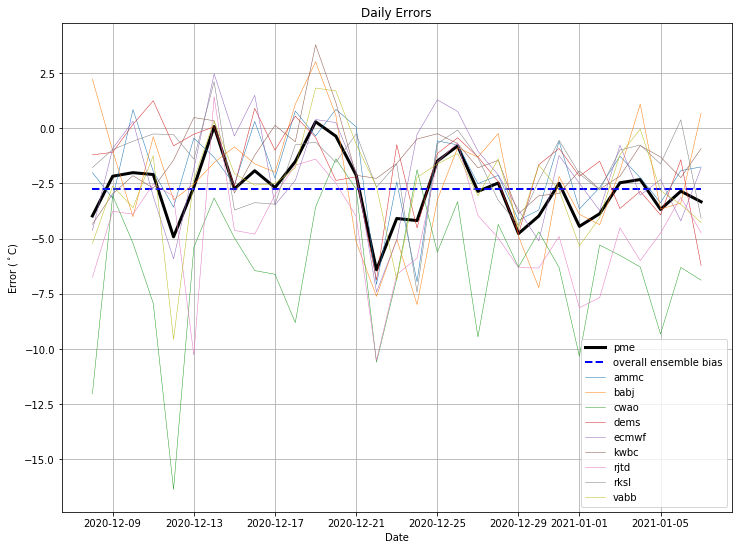

In [895]:
fig = plt.figure(figsize=(12,9))
bias_ens_vec = np.ones(errors.shape[1]) * bias_ens

plt.plot(DAT_OBS.index, df_errors['pme'], 'k', linewidth = 3, label = "pme")
plt.plot(DAT_OBS.index, bias_ens_vec, 'b--', linewidth = 2, label = "overall ensemble bias")

for i in range(0,9):
    plt.plot(DAT_OBS.index, df_errors[origin_names[i]], label = origin_names[i], linewidth = 0.5)
    
plt.legend()
plt.title("Daily Errors")
plt.xlabel("Date")
plt.ylabel("Error ($^\circ$C)")
plt.grid()

plt.savefig('..\\figures\\bias_all_1')

---
### RMSE

Square the errors, average the squares over the month, and take the square root of this average:

In [896]:
((df_errors**2).mean(axis=0)**(0.5)).mean()

3.5466594248169114

In [897]:
rmse = np.array((df_errors**2).mean(axis=0)**(0.5))

rmse_ens = rmse.mean()

In [898]:
rmse_ens

3.5466594248169123

In [940]:
for i in np.round(rmse,2):
    print(i)

2.78
3.55
7.09
2.62
3.04
2.15
5.24
2.46
3.42
3.12


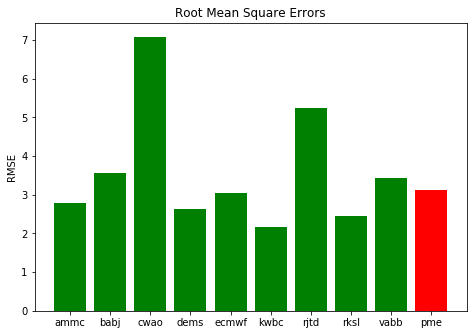

In [900]:
xbar = origin_names.tolist()
xbar.append('pme')

# Plotting a barchart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xbar[:-1], rmse[:-1], color = "g")
ax.bar(xbar[-1], rmse[-1], color = "r")
plt.title("Root Mean Square Errors")
plt.ylabel("RMSE")
plt.savefig('..\\figures\\RMSE_1.png', bbox_inches='tight')

---
### ACC
Anomaly correlation coefficient


Compute climatology coefficient *c* from observed data spanning three decades:

In [735]:
OBS_ROLL = OBS.rolling(window=30, center=True).mean()
OBS_30 = OBS_ROLL['19810101':'20101231']
OBS_CL = OBS_30.groupby([OBS_30.index.month, OBS_30.index.day]).mean()

<xarray.DataArray 't2m' (time: 31)>
array([-3.972132, -1.97227 , -2.510494, -2.8957  , -1.51791 ,  1.136622,
        2.67916 ,  1.559244,  1.376229,  1.114385,  0.992007,  0.795326,
        2.141533,  2.675641,  3.389611,  5.413297,  2.0187  , -0.686364,
       -2.200307, -4.159508, -1.180178, -1.47093 , -2.475354, -1.592563,
       -3.543788, -3.37043 , -3.069399, -3.421818, -5.176045, -4.151262,
       -3.629617], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-08 2020-12-09 ... 2021-01-07
    longitude  float32 8.5
    latitude   float32 47.5

In [743]:
ENS = pd.DataFrame({origin_names[0]: T2M_ENS_D[0,:],
                     origin_names[1]: T2M_ENS_D[1,:],
                     origin_names[2]: T2M_ENS_D[2,:],
                     origin_names[3]: T2M_ENS_D[3,:],
                     origin_names[4]: T2M_ENS_D[4,:],
                     origin_names[5]: T2M_ENS_D[5,:],
                     origin_names[6]: T2M_ENS_D[6,:],
                     origin_names[7]: T2M_ENS_D[7,:],
                     origin_names[8]: T2M_ENS_D[8,:],
                     'ens mean': T2M_ENS_D.mean(axis=0)
                    }, index=pd.to_datetime(T2M_ENS_D.time.values) )

In [744]:
ENS.shape

(31, 10)

In [745]:
cs = [OBS_CL[ENS.index.month[i], ENS.index.day[i]] for i in range(ENS.shape[0])]

In [771]:
ENS.shape

(31, 10)

In [780]:
ACC = np.array([])

for i in range(ENS.shape[1]):
    # initialise
    tot1 = 0
    tot2 = 0
    tot3 = 0
    
    for j in range(ENS.shape[0]):
        
        f = ENS.iat[j,i]
        obs = DAT_OBS[j]
        c = cs[j]
        
        tmp1 = f-c
        tmp2 = obs-c
        
        tot1 += tmp1 * tmp2
        tot2 += tmp1**2
        tot3 += tmp2**2
        
    mean1 = tot1/ENS.shape[0]
    mean2 = tot2/ENS.shape[0]
    mean3 = tot3/ENS.shape[0]
    
    acc = mean1 / np.sqrt( mean2 * mean3 )
    ACC = np.append(ACC, acc)
    
ACC[:-1].mean()

0.4802254178333018

Make table here:

In [942]:
for i in np.round(ACC,2):
    print(i)

0.56
0.3
0.21
0.62
0.52
0.78
0.18
0.64
0.51
0.5


Add in ensemble mean:

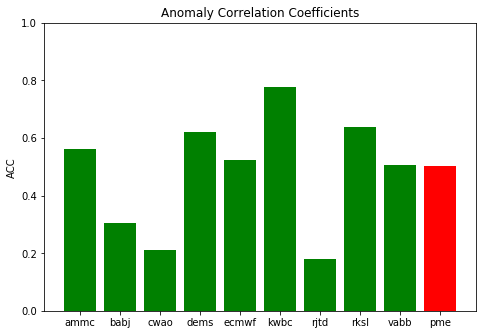

In [829]:
# Plotting a barchart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

xbar = origin_names.tolist()
xbar.append('pme')

ax.bar(xbar[:-1], ACC[:-1], color = "g")
ax.bar(xbar[-1], ACC[-1], color = "r")
plt.title("Anomaly Correlation Coefficients")
plt.ylim(0,1)
plt.ylabel("ACC")
#'..\\figures\\RMSE_1.png', bbox_inches='tight'
fig.savefig('..\\figures\\ACC', bbox_inches='tight')



---
### Rank Histogram

In [582]:
# append observed data to ENS

ENS['OBS'] = DAT_OBS

In [578]:
rank_count = np.zeros(ENS.shape[1])

for i in range(ENS.shape[0]):
    ranked = ENS.iloc[i,:].sort_values()
    rank = ranked.index.get_loc('OBS')
    rank_count[rank] += 1
    
rank_count   # ... contains the frequency of the rank of the observed temperature, from low to high

array([ 0.,  0.,  0.,  1.,  1.,  1.,  3.,  0., 10., 15.])

In [791]:
np.arange(10,0,-1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

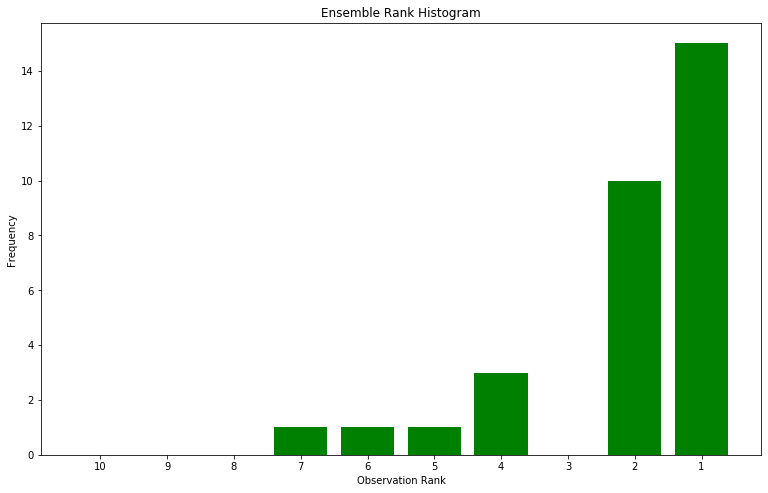

In [953]:
# plot histogram

fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
xbar = [str(i) for i in np.arange(10,0,-1)]
ax.bar(xbar, rank_count, color='green')
ax.set_xlabel('Observation Rank')
ax.set_ylabel('Frequency')
ax.set_title('Ensemble Rank Histogram')
plt.savefig('..\\figures\\RH_1', bbox_inches='tight')

Plot histogram. **Return to this to personalise**

**Clearly left-skewed**

---

## Systematic Errors

What to do here? Comment on the systematic errors. Mention the ensemble mean as well as individual forecasts. Manipulate the ensemble to give a better prediction (Weights). Subtract bias.

*Identify some clear systematic errors, then it would be interesting to see what happens when you try to remove them.*

Caveat: A 31-day period is a small sample size. We are about to tailor the ensemble to best match this period. Further analysis of the tailored ensemble on other samples would be needed to assess its skill.


### Remove Bias

In [877]:
# subtract bias

T2M_ENS_D_UNBIASED = T2M_ENS_D - bias_ens

ENS_AVG_UNBIASED = (T2M_ENS_D_UNBIASED.mean(axis=0))

In [878]:
(ENS_AVG_UNBIASED - DAT_OBS).mean()

<xarray.DataArray ()>
array(-5.479782e-09)
Coordinates:
    longitude  float32 8.5
    latitude   float32 47.5

Plot of the forecasts with overall bias subtracted:

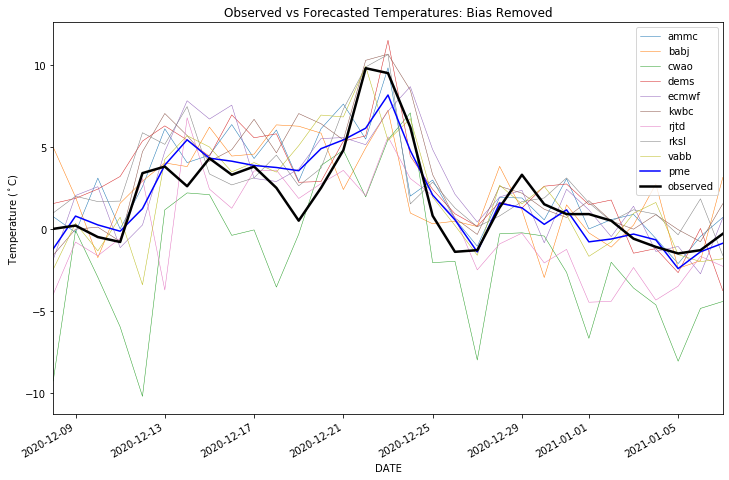

In [818]:
fig = plt.figure(figsize=(12,8))

for i in range(len(T2M_ENS_D_UNBIASED)):
    T2M_ENS_D_UNBIASED[i].plot(linewidth=0.5, label=origin_names[i])

ENS_AVG_UNBIASED.plot(color='b', linewidth=1.5, label='pme')
DAT_OBS.plot(color='k', linewidth=2.5, label='observed')

plt.title('Observed vs Forecasted Temperatures: Bias Removed')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend(loc='upper right')

plt.savefig('..\\figures\\OvF2', bbox_inches='tight')

In [601]:
errors_new = np.zeros(T2M_ENS_D_UNBIASED.shape)

for i in range(T2M_ENS_D_UNBIASED.shape[0]):
    errors_new[i] = T2M_ENS_D_UNBIASED[i] - DAT_OBS
    
bias_new = errors_new.mean(axis=1)    # Mean of errors gives bias for each forecast

bias_ens_new = bias_new.mean()

In [939]:
bias_new
for i in np.round(bias_new,2):
    print(i)

0.73
0.45
-3.61
0.96
0.76
1.3
-1.81
1.04
0.19


In [604]:
bias_ens_new

4.22146157351576e-08

In [825]:
# Make a Pandas DataFrame of the errors

df_errors_new = pd.DataFrame(errors_new.transpose(), columns = origin_names.tolist())
df_errors_new['pme'] = df_errors_new.mean(axis=1)
df_errors_new

,ammc,babj,cwao,dems,ecmwf,kwbc,rjtd,rksl,vabb,pme
0,0.746236,4.984525,-9.279460,1.546445,-1.879550,-1.602549,-3.998355,0.970433,-2.471148,-1.220380
1,-0.422155,1.735155,-0.298727,1.661196,1.835596,-0.218008,-1.006857,1.789965,0.139177,0.579482
2,3.596982,-1.256175,-2.449832,2.927404,3.071180,0.605321,-1.141398,2.164350,-0.846507,0.741258
3,0.799990,2.363993,-5.180617,3.998385,-0.344191,0.036387,0.227877,2.494417,1.508234,0.656053
4,-0.823411,-0.491487,-13.615877,1.955687,-3.161126,1.312361,-0.323655,2.464240,-6.812150,-2.166158
5,2.304276,0.222817,-2.641578,2.481743,0.919800,3.236832,-7.524871,1.355889,0.440460,0.088374
6,1.440318,1.199627,-0.408299,2.820560,5.214137,3.092456,4.176586,4.858325,3.084499,2.830912
7,0.195122,1.908386,-2.213638,0.124687,2.398331,-0.181999,-1.874694,-0.952262,0.695030,0.010996
8,3.062912,1.141579,-3.695152,3.652344,4.247711,1.528443,-2.043701,-0.618820,0.176514,0.827981
9,0.491547,0.760880,-3.863899,1.755226,-0.722343,2.886261,-0.267761,-0.688575,0.243897,0.066137


Plot errors and bias:

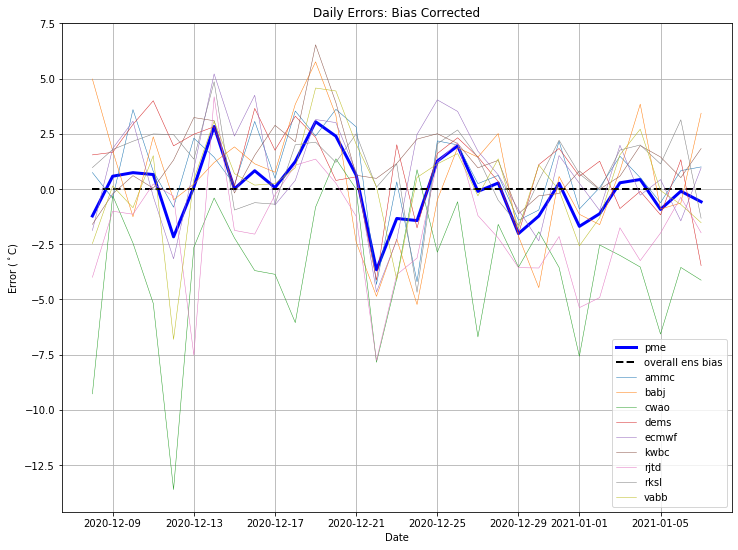

In [880]:
fig = plt.figure(figsize=(12,9))
bias_ens_vec_new = np.ones(errors_new.shape[1]) * bias_ens_new

plt.plot(DAT_OBS.index, df_errors_new['pme'], 'b', linewidth = 3, label = "pme")
plt.plot(DAT_OBS.index, bias_ens_vec_new, 'k--', linewidth = 2, label = "overall ens bias")

for i in range(0,9):
    plt.plot(DAT_OBS.index, df_errors_new[origin_names[i]], label = origin_names[i], linewidth = 0.5)
    
plt.legend()
plt.title("Daily Errors: Bias Corrected")
plt.xlabel("Date")
plt.ylabel("Error ($^\circ$C)")
plt.grid()

plt.savefig('..\\figures\\bias_all_2', bbox_inches='tight')

### Bias-Removed RMSE

In [901]:
rmse_new = np.array((df_errors_new**2).mean(axis=0)**(0.5))

rmse_new

array([2.04657467, 2.73988682, 4.77284713, 2.13924029, 2.41439605,
       2.04963525, 3.14788405, 2.04404154, 2.26972052, 1.47108522])

In [941]:
for i in np.round(rmse_new,2):
    print(i)

2.05
2.74
4.77
2.14
2.41
2.05
3.15
2.04
2.27
1.47


In [903]:
rmse_ens_new = rmse_new.mean()
rmse_ens_new

2.5095311534489326

In [904]:
rmse_ens

3.5466594248169123

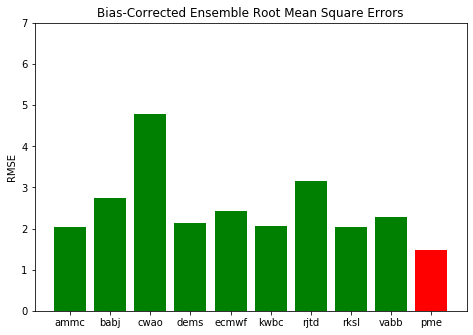

In [906]:
xbar = origin_names.tolist()
xbar.append('pme')

# Plotting a barchart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xbar[:-1], rmse_new[:-1], color = "g")
ax.bar(xbar[-1], rmse_new[-1], color = "r")
plt.title("Bias-Corrected Ensemble Root Mean Square Errors")
plt.ylabel("RMSE")
plt.ylim(0,7)
plt.savefig('..\\figures\\RMSE_2.png', bbox_inches='tight')

### Bias-Removed ACC

In [912]:
ENS_new = pd.DataFrame({origin_names[0]: T2M_ENS_D_UNBIASED[0,:],
                     origin_names[1]: T2M_ENS_D_UNBIASED[1,:],
                     origin_names[2]: T2M_ENS_D_UNBIASED[2,:],
                     origin_names[3]: T2M_ENS_D_UNBIASED[3,:],
                     origin_names[4]: T2M_ENS_D_UNBIASED[4,:],
                     origin_names[5]: T2M_ENS_D_UNBIASED[5,:],
                     origin_names[6]: T2M_ENS_D_UNBIASED[6,:],
                     origin_names[7]: T2M_ENS_D_UNBIASED[7,:],
                     origin_names[8]: T2M_ENS_D_UNBIASED[8,:],
                     'pme': T2M_ENS_D_UNBIASED.mean(axis=0)
                    }, index=pd.to_datetime(T2M_ENS_D_UNBIASED.time.values) )

In [943]:
ACC_new = np.array([])

for i in range(ENS_new.shape[1]):
    # initialise
    tot1 = 0
    tot2 = 0
    tot3 = 0
    
    for j in range(ENS_new.shape[1]):
        
        f = ENS_new.iat[j,i]
        obs = DAT_OBS[j]
        c = cs[j]
        
        tmp1 = f-c
        tmp2 = obs-c
        
        tot1 += tmp1 * tmp2
        tot2 += tmp1**2
        tot3 += tmp2**2
        
    mean1 = tot1/ENS_new.shape[1]
    mean2 = tot2/ENS_new.shape[1]
    mean3 = tot3/ENS_new.shape[1]
    
    acc = mean1 / np.sqrt( mean2 * mean3 )
    ACC_new = np.append(ACC_new, acc)
    
for i in np.round(ACC_new,2):
    print(i)  # Make Table

0.76
0.66
0.25
0.63
0.67
0.9
0.45
0.6
0.61
1.0


In [918]:
ACC_new[:-1].mean()  

0.6151114581387702

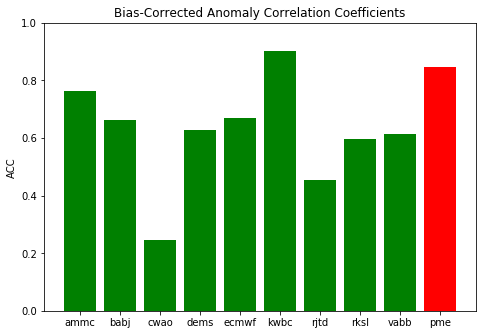

In [916]:
# Plotting a barchart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


xbar = origin_names.tolist()
xbar.append('pme')

ax.bar(xbar[:-1], ACC_new[:-1], color = "g")
ax.bar(xbar[-1], ACC_new[-1], color = "r")
plt.title("Bias-Corrected Anomaly Correlation Coefficients")
plt.ylim(0,1)
plt.ylabel("ACC")
#fig.savefig('..\\figures\\ACC_2', bbox_inches='tight')


### Bias-Removed Rank Histogram

In [932]:
# append observed data to ENS

ENS_new['OBS'] = DAT_OBS
ENS_new = ENS_new.drop('pme', axis=1)

KeyError: "['pme'] not found in axis"

In [933]:
rank_count_new = np.zeros(ENS_new.shape[1])

for i in range(ENS_new.shape[0]):
    ranked = ENS_new.iloc[i,:].sort_values()
    rank = ranked.index.get_loc('OBS')
    rank_count_new[rank] += 1
    
rank_count_new   # ... contains the frequency of the rank of the observed temperature, from low to high

array([1., 4., 3., 5., 6., 6., 4., 1., 0., 1.])

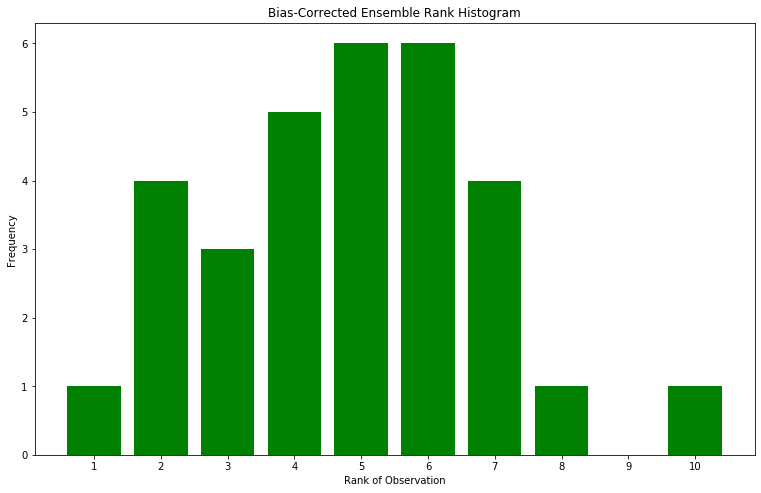

In [954]:
# plot histogram

fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
xbar = [str(i) for i in np.arange(1,11)]
ax.bar(xbar, rank_count_new, color='green')
ax.set_xlabel('Rank of Observation')
ax.set_ylabel('Frequency')
ax.set_title('Bias-Corrected Ensemble Rank Histogram')
fig.savefig('..\\figures\\RH_2', bbox_inches='tight')

# underconfident